# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [11]:
# you could start with something like this...
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas
import numpy as np

datafile = 'data/dataset.csv'

df = pd.read_csv(datafile) # df for dataframe but you can call it whatever you like

print(df.shape)

rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

df.head()



(496, 10)
Number of rows: 496
Number of columns: 10


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
0,3.371,16.877,15.345,8.080,8.510,14.404,5.904,-0.368,11.604,3.321
1,11.765,18.278,9.311,4.095,13.699,1.487,16.061,7.425,5.981,-0.338
2,3.966,2.498,9.110,12.823,-0.337,15.771,5.326,18.289,12.466,9.633
3,11.498,16.627,10.134,3.632,13.124,1.083,17.141,8.624,6.133,0.015
4,12.262,18.252,10.158,4.073,14.841,2.451,15.654,8.131,5.142,-0.079


## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

<AxesSubplot:xlabel='dim1', ylabel='dim2'>

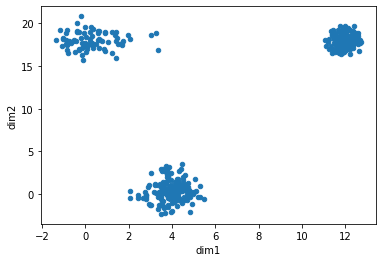

In [9]:

df.plot.scatter( x='dim1', y='dim2')


### I can see 3 clusters in this plot of dim1 against dim2 ###

## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

## First we scale the data (subtract mean and divide by stdev) for each value. ##
#### This will take care of any issues that may arise from different columns having different units/scales. ####

In [21]:
# Scaling the data first

from sklearn.preprocessing import StandardScaler
# create the sklearn object
scaler = StandardScaler()

# fit the model (in this case, that means estimating the mean and variance)
scaler.fit(df)


# transform the data
# that means subtract the mean and divide by the standard deviation
df_scaled = scaler.transform(df)

# check the mean, std-dev of the first column
print( 'the mean of the values in first column in the scaled data set is:', np.mean( df_scaled[:,0]))
print('the standard deviation of the values in first column in the scaled data set is:', np.std( df_scaled[:,0]))

the mean of the values in first column in the scaled data set is: 1.8264959437381609e-16
the standard deviation of the values in first column in the scaled data set is: 1.0


#### The point of scaling is to subtract the mean from each value and divide by the standard deviation in order to produce a set of "z-scores" which have a standardized distribution with a mean = 0 and standard deviation = 1. We check that the scaling worked correctly, since the mean of values in a column is basically zero and the stdev is = 1. ####

## Now we do the actual PCA on the scaled data ##

In [24]:
# start by importing the PCA class
from sklearn.decomposition import PCA

# 1. create and configure the model (call it "pca")
pca = PCA(n_components=10)

# 2. fit the model to the data (use pca.fit(...) )
pca.fit(df_scaled)

# 3. look at the model's explained_variance_ratio_ to see how much variance the top two components capture.
print('The fraction of the total variance explained by the first component is:', pca.explained_variance_ratio_[0])
print('The fraction of the total variance explained by the second component is:', pca.explained_variance_ratio_[1])
print('The total explained variance is :', np.sum(pca.explained_variance_ratio_))




The fraction of the total variance explained by the first component is: 0.7176480872367671
The fraction of the total variance explained by the second component is: 0.14764088428622646
The total explained variance is : 1.0


#### The first component explains ~72% of the variance in the data. ####
#### The second component explains ~15% of the variance in the data. ####
#### Together, the first two components explain about 87% of the variation in the data, meaning we aren't losing that much by only using the first two components and dropping the other eight. ####

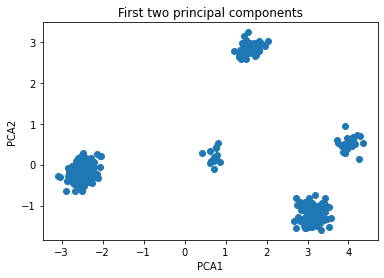

In [26]:
# 4. transform the data to a new array, call it "X_pca" 
X_pca = pca.transform(df_scaled)


# 5. Plot the first two components, as we did in class.
# Now the first two columns of X_pca represent the axes of 
#  greatest variation, so we can plot just those and retain
#  the maximum information.

plt.scatter( X_pca[:,0], X_pca[:,1],)
plt.title('First two principal components')
plt.xlabel('PCA1')
plt.ylabel('PCA2');



### After doing PCA, transforming the data and plotting along the two principal compoments, I see 5 clusters in the data. ###

#### Before PCA, just plotting the first two dimensions, I only saw three clusters, so the PCA helped reveal additional structure in the data set. ####

## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

cluster sizes: 0    256
1    128
2     64
3     32
4     16
Name: clusters, dtype: int64


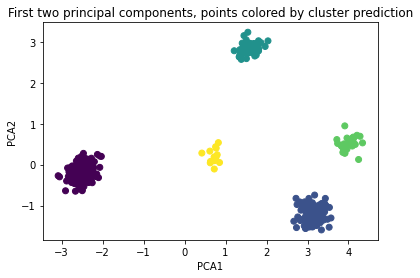

In [34]:
from sklearn.cluster import KMeans


# 1. create a KMeans object, call it kmeans; you'll need to tell it how many clusters to find
kmeans = KMeans(n_clusters=5, random_state=10)

# 2. fit the object to the data using kmeans.fit
kmeans.fit(df_scaled)

# 3. Get the list of clusters using kmeans.predict
#    Name the returned array of cluster assignments "clusters"
clusters = kmeans.predict(df_scaled)

# To get the cluster sizes, first look at the array of clusters returned by kmeans.predict
#   to see that the different values are integers between 0 and nclust-1, inclusive.
clusters

# To get the size of each cluster, you could write a for loop over the different cluster
# numbers, and inside the loop you could count how many elements in clusters array are
# equal to that cluster number. Instead, do it by creating a new column in the dataframe 
# containing the cluster assignments, and using the pandas method value_counts:

df['clusters'] = clusters # create a new column in the dataframe with the KMeans cluster assignments

print('cluster sizes:', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects

# use this code to remake the PCA plot colored by the kmeans clusters, where "clusters" is the 
#  array returned by the kmeans.predict function  
plt.scatter( X_pca[:,0], X_pca[:,1], c=clusters )
plt.title('First two principal components, points colored by cluster prediction')
plt.xlabel('PCA1')
plt.ylabel('PCA2');




## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

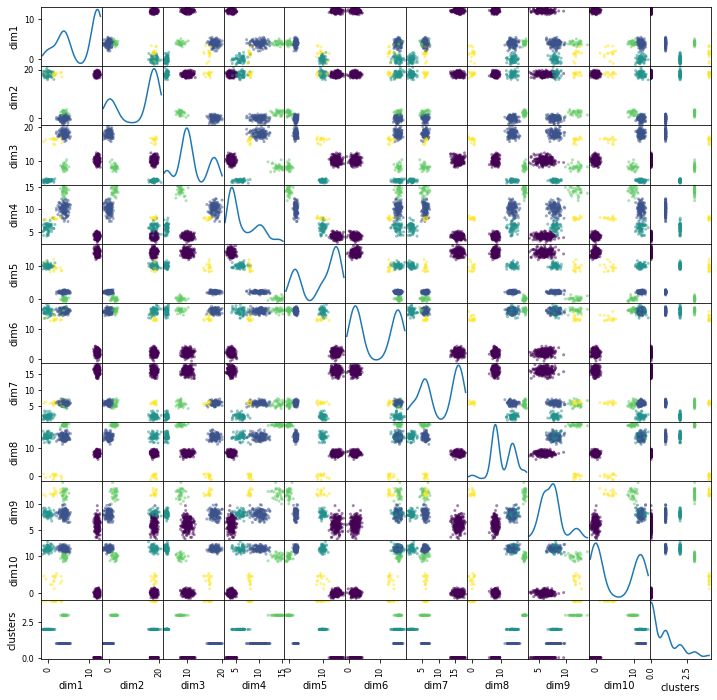

In [38]:
# using pandas
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(12,12), c=df['clusters']);

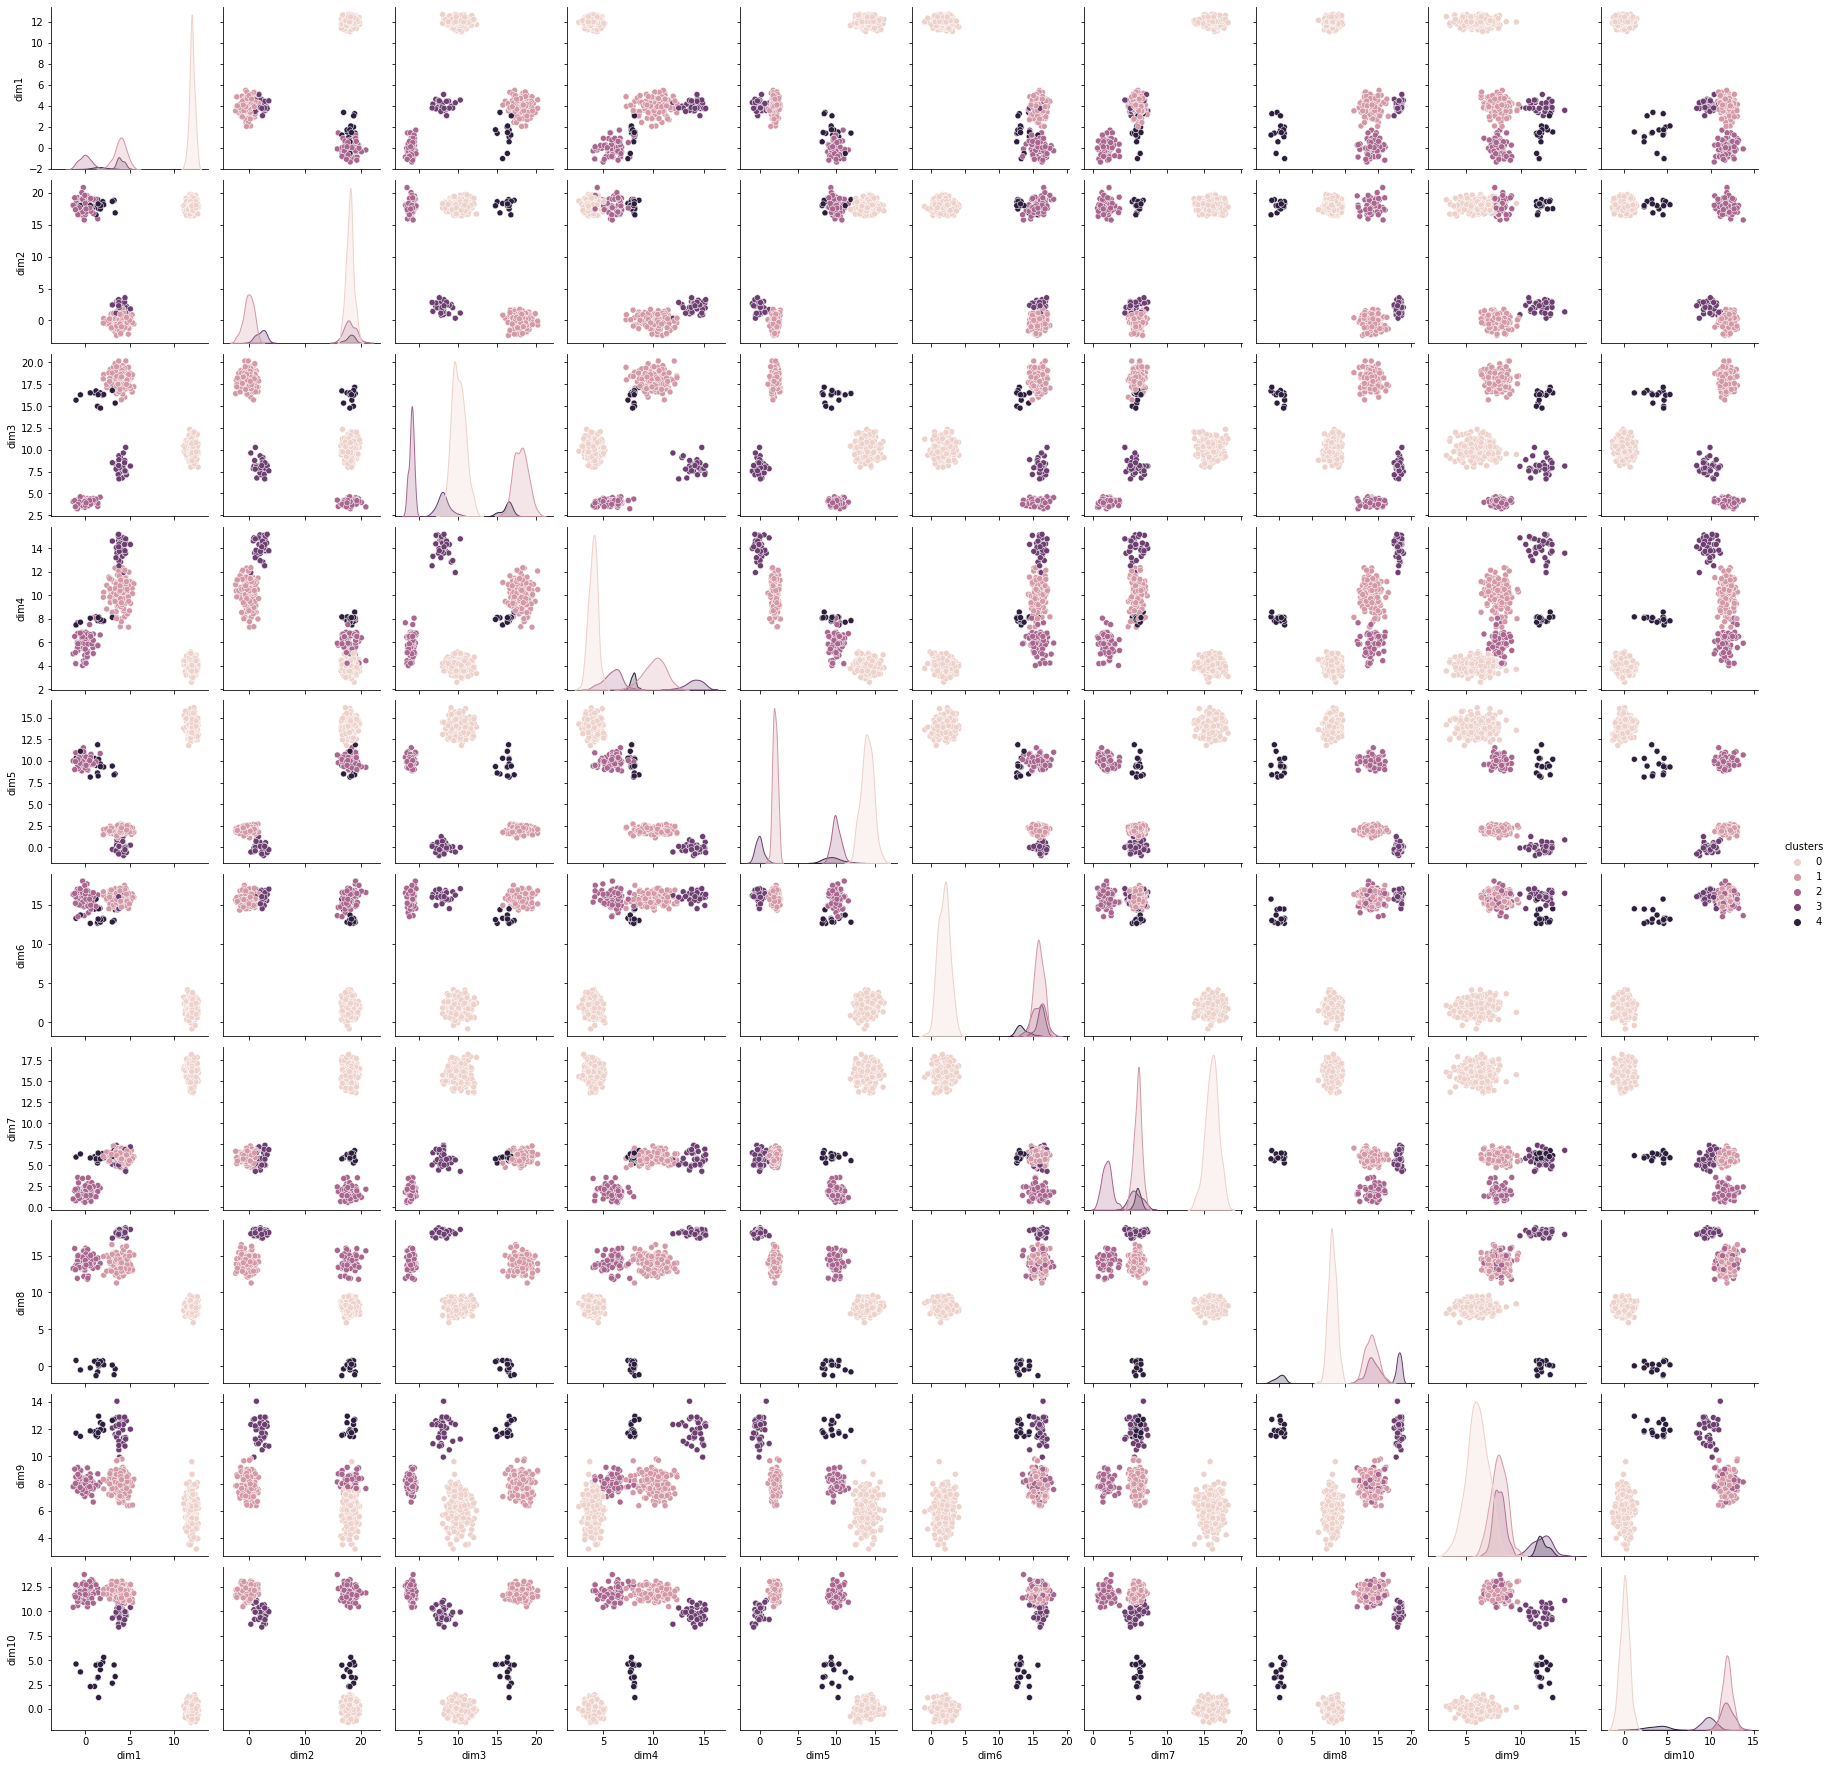

In [39]:
# using seaborn
import seaborn as sns
sns.pairplot(df, hue= 'clusters')


### Visually inspecting the two graphs, the first (pandas) graph has the advantage that the diagonal grpahs are easier to interperet (they are just histograms of the distribution of values in that column). In the seaborn plot, the diagonal grpahs show the distribution of each cluster assignment. ###

### In any of the scatter plots between any two columns, visually there are always only 5 clusters or less - some have only 3 or 4 clusters. Some graphs have more sepratated clusters and some have clusters that merge together, but never more than 5 distinct clusters. This makes sense because our PCA identified 5 clusters. Because the principal components are made up of linear combinations of the variables, it wouldn't make sense for any two variables to identify extra clusters that were not present in the PCA. ###

## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


cluster sizes: 0    256
1    128
2     64
3     32
4     16
Name: clusters, dtype: int64


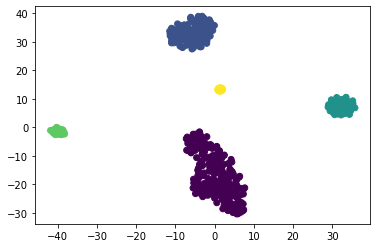

In [41]:
from sklearn.manifold import TSNE

# 1. create the TSNE object, call it tsne. Tell it you want 2 components (ie, a 2D projection) 
tsne = TSNE(n_components=2, random_state=20)

# 2. Fit the data to the model and transform to a new array (call it X_tsne) using tsne.fit_transform
#     This combines the fit and transform steps into a single operation.
X_tsne = tsne.fit_transform(df_scaled)


# Use this matplotlib command to make a scatter plot of the two components, colored by the 
#  kmeans cluster assignments
plt.scatter( X_tsne[:,0], X_tsne[:,1], c=clusters )

print('cluster sizes:', df['clusters'].value_counts())


### I still see 5 clusters in the data, just as in the PCA analysis earlier, but the relative positions and 'shape' of the clusters is different than in PCA. The biggest cluster (purple) looks more spread-out while the smallest cluster (yellow) looks like it's almost one point because of how close together it is. Since TSNE also takes into account non-linear relationships (unlike PCA), it makes sense that the output would looks somewhat different. ###